<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-orden-66/blob/main/Reto_Entrega_1_Equipo_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ciencia y Analítica de Datos
***Maestria en Inteligencia Artificial Aplicada***

Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans

**Profesora:**

Dra. María de la Paz Rico Fernández

Mtr. Orlando Figón Cruz


**Alumnos:**

Fernando Ivan Ramos Esparza 

Roberto Ferro Salinas

**Matrículas:**

A01373377

A01374849

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests, zipfile
# import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
# activate plot theme
# import qeds
# qeds.themes.mpl_style();

## Limpiamos los datos de la base de datos


In [192]:
!wget = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

--2022-11-17 05:19:32--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-11-17 05:19:32--  http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
Connecting to 201.116.60.46:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2556825 (2.4M) [application/x-zip-compressed]
Saving to: ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.10’

Datos_de_calidad_de 100%[===================>]   2.44M  2.02MB/s    in 1.2s    

2022-11-17 05:19:33 (2.02 MB/s) - ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.10’ saved [2556825/2556825]

FINISHED --2022-11-17 05:19:33--
Total wall clock time: 1.3s
Downloaded: 1 files, 2.4M in 1.2s (2.02 MB/s)


In [193]:
!unzip /content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip

Archive:  /content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
replace Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [194]:
!ls

Datos_de_calidad_del_agua_2020
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.1
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.10
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.2
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.3
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.4
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.5
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.6
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.7
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.8
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.9
sample_data


In [195]:
df = pd.read_csv("Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",  encoding = 'latin1')

In [196]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [197]:
df.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [198]:
df = df.drop(['CONTAMINANTES', 'SDT_mg/L', 'PERIODO'], axis=1)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [199]:
df["CALIDAD_CONDUC"].value_counts(sort=False)

Permisible para riego    460
Buena para riego         434
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      45
Name: CALIDAD_CONDUC, dtype: int64

In [200]:
df['CALIDAD_CONDUC'].fillna(df['CALIDAD_CONDUC'].mode(), inplace=True)
print("Valores perdidos en CALIDAD_CONDUC: " + 
      str(df['CALIDAD_CONDUC'].isnull().sum()))

Valores perdidos en CALIDAD_CONDUC: 6


In [201]:
df["CALIDAD_ALC"].value_counts(sort=False)

Alta                    794
Media                   187
Baja                     24
Indeseable como FAAP     59
Name: CALIDAD_ALC, dtype: int64

In [202]:
df['CALIDAD_ALC'].fillna(df['CALIDAD_ALC'].mode(), inplace=True)
print("Valores perdidos en CALIDAD_ALC: " + 
      str(df['CALIDAD_ALC'].isnull().sum()))

Valores perdidos en CALIDAD_ALC: 4


In [203]:
df["CALIDAD_SDT_ra"].value_counts(sort=False)

Cultivos sensibles              343
Excelente para riego            491
Cultivos con manejo especial    161
Cultivos tolerantes              64
Indeseable para riego             7
Name: CALIDAD_SDT_ra, dtype: int64

In [204]:
# Imputamos la variable CALIDAD_SDT_ra con la moda
df['CALIDAD_SDT_ra'].fillna(df['CALIDAD_SDT_ra'].mode("Excelente para riego"), inplace=True)
print("Valores perdidos en CALIDAD_SDT_ra: " + 
      str(df['CALIDAD_SDT_ra'].isnull().sum()))

Valores perdidos en CALIDAD_SDT_ra: 2


## Explorar los datos

In [205]:
df = df.dropna().reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1054 non-null   object 
 1   SITIO                 1054 non-null   object 
 2   ORGANISMO_DE_CUENCA   1054 non-null   object 
 3   ESTADO                1054 non-null   object 
 4   MUNICIPIO             1054 non-null   object 
 5   ACUIFERO              1054 non-null   object 
 6   SUBTIPO               1054 non-null   object 
 7   LONGITUD              1054 non-null   float64
 8   LATITUD               1054 non-null   float64
 9   ALC_mg/L              1054 non-null   float64
 10  CALIDAD_ALC           1054 non-null   object 
 11  CONDUCT_mS/cm         1054 non-null   float64
 12  CALIDAD_CONDUC        1054 non-null   object 
 13  SDT_M_mg/L            1054 non-null   object 
 14  CALIDAD_SDT_ra        1054 non-null   object 
 15  CALIDAD_SDT_salin    

In [206]:
df.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
count,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,234.695266,1142.726471
std,6.697568,3.875005,111.147849,1248.990617
min,-116.664250,14.561150,26.640000,110.000000
25%,-105.385170,20.224857,164.257500,506.000000
50%,-102.170665,22.640705,215.825000,820.000000
75%,-98.971268,25.508770,292.930000,1328.000000
max,-86.864120,32.677713,1650.000000,18577.000000


In [207]:
fig = px.histogram(df, 'ALC_mg/L', marginal = 'box')
fig.update_layout(bargap=0.2)
fig.show()

In [208]:
fig = px.histogram(df, 'CONDUCT_mS/cm', marginal = 'box')
fig.update_layout(bargap=0.2)
fig.show()

## Analizamos la base de datos

In [209]:
df['N_SITIO'] = pd.Categorical(df['SITIO']).codes
df['N_SUBTIPO'] = pd.Categorical(df['SUBTIPO']).codes
df['N_CALIDAD_ALC'] = pd.Categorical(df['CALIDAD_ALC']).codes
df['N_CALIDAD_CONDUC'] = pd.Categorical(df['CALIDAD_CONDUC']).codes
df['N_CALIDAD_SDT_ra'] = pd.Categorical(df['CALIDAD_SDT_ra']).codes
df['N_CALIDAD_SDT_salin'] = pd.Categorical(df['CALIDAD_SDT_salin']).codes
df['N_CALIDAD_FLUO'] = pd.Categorical(df['CALIDAD_FLUO']).codes
df['N_CALIDAD_DUR'] = pd.Categorical(df['CALIDAD_DUR']).codes
df['N_CALIDAD_COLI_FEC'] = pd.Categorical(df['CALIDAD_COLI_FEC']).codes
df['N_CALIDAD_N_NO3_FEC'] = pd.Categorical(df['CALIDAD_N_NO3']).codes
df['N_CALIDAD_AS'] = pd.Categorical(df['CALIDAD_AS']).codes
df['N_CALIDAD_CD'] = pd.Categorical(df['CALIDAD_CD']).codes
df['N_CALIDAD_CR'] = pd.Categorical(df['CALIDAD_CR']).codes
df['N_CALIDAD_HG'] = pd.Categorical(df['CALIDAD_HG']).codes
df['N_CALIDAD_PB'] = pd.Categorical(df['CALIDAD_PB']).codes
df['N_CALIDAD_MN'] = pd.Categorical(df['CALIDAD_MN']).codes
df['N_CALIDAD_FE'] = pd.Categorical(df['CALIDAD_FE']).codes
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,N_CALIDAD_DUR,N_CALIDAD_COLI_FEC,N_CALIDAD_N_NO3_FEC,N_CALIDAD_AS,N_CALIDAD_CD,N_CALIDAD_CR,N_CALIDAD_HG,N_CALIDAD_PB,N_CALIDAD_MN,N_CALIDAD_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,1,4,2,0,1,1,1,1,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,1,4,1,0,1,1,1,1,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,1,4,2,1,1,1,1,1,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,1,4,2,0,1,1,1,1,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,1,0,0,2,1,1,1,1,0,0


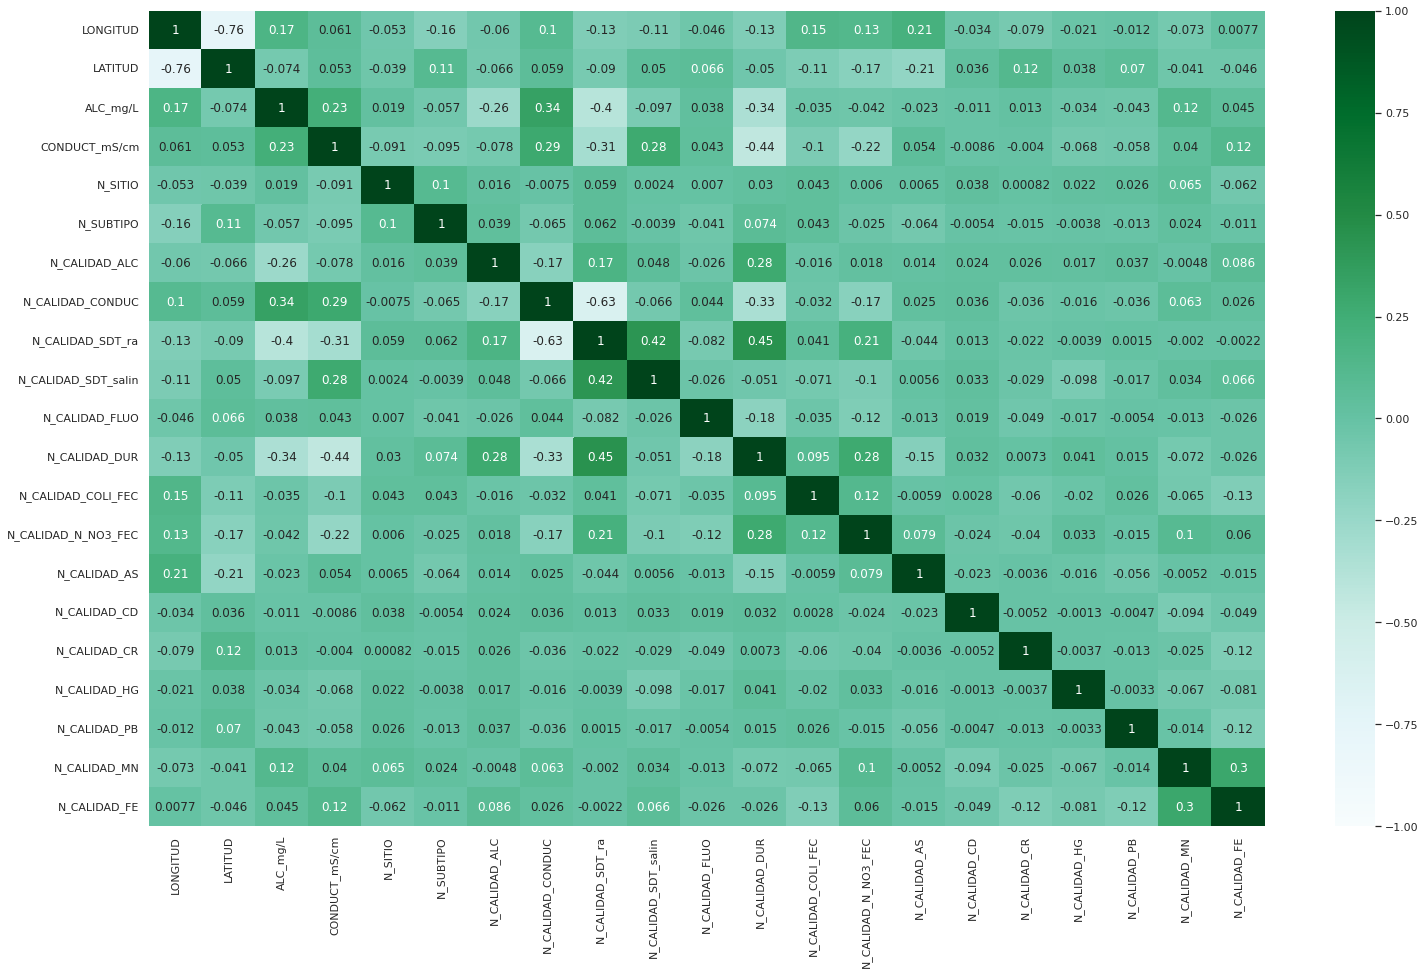

In [210]:
sns.set(rc = {'figure.figsize':(25,15)}) 
sns.heatmap(df.corr(), annot = True, cmap = 'BuGn', vmin = -1, vmax = 1)
plt.show()

In [211]:
df["Coordenadas"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordenadas"] = df["Coordenadas"].apply(Point)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,N_CALIDAD_COLI_FEC,N_CALIDAD_N_NO3_FEC,N_CALIDAD_AS,N_CALIDAD_CD,N_CALIDAD_CR,N_CALIDAD_HG,N_CALIDAD_PB,N_CALIDAD_MN,N_CALIDAD_FE,Coordenadas
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,4,2,0,1,1,1,1,0,0,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,4,1,0,1,1,1,1,0,0,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,4,2,1,1,1,1,1,0,0,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,4,2,0,1,1,1,1,0,0,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0,0,2,1,1,1,1,0,0,POINT (-110.2448 23.45138)


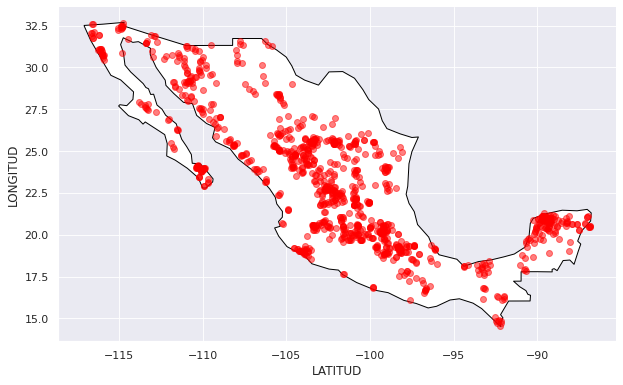

In [212]:
puntos_en_mapa = gpd.GeoDataFrame(df, geometry="Coordenadas")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_en_mapa.plot(ax=gax, color='red', alpha = 0.5)
#puntos_en_mapa

## Aplicamos el método de agrupamiento K-means

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.



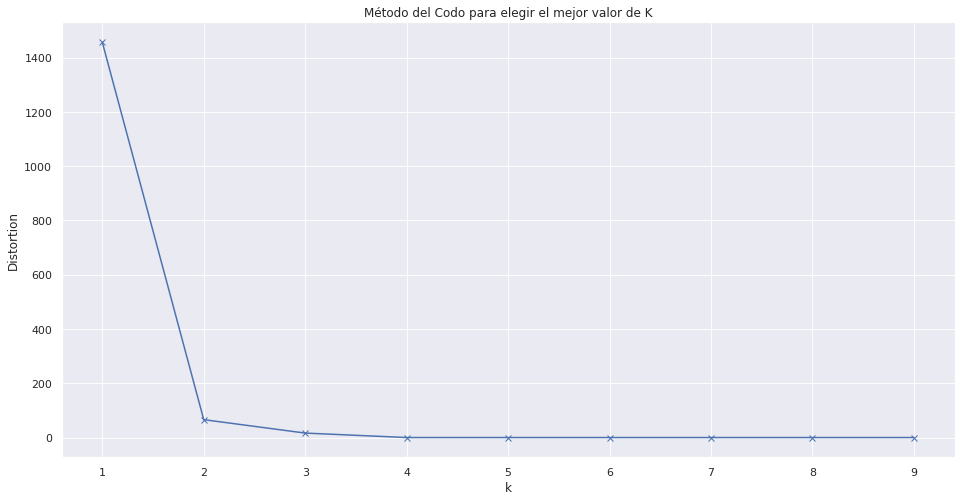

In [213]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['N_CALIDAD_ALC']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Método del Codo para elegir el mejor valor de K')
plt.show()

In [214]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df[['N_CALIDAD_ALC']])
df['k_means']=kmeanModel.predict(df[['N_CALIDAD_ALC']]).astype(str)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,N_CALIDAD_N_NO3_FEC,N_CALIDAD_AS,N_CALIDAD_CD,N_CALIDAD_CR,N_CALIDAD_HG,N_CALIDAD_PB,N_CALIDAD_MN,N_CALIDAD_FE,Coordenadas,k_means
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,2,0,1,1,1,1,0,0,POINT (-102.02210 22.20887),0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,1,0,1,1,1,1,0,0,POINT (-102.20075 21.99958),0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,2,1,1,1,1,1,0,0,POINT (-102.28801 22.36685),0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,2,0,1,1,1,1,0,0,POINT (-102.29449 22.18435),0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0,2,1,1,1,1,0,0,POINT (-110.24480 23.45138),0


In [215]:
kmeans = KMeans(n_clusters=3).fit(df[['N_CALIDAD_ALC']])
# Predicting the clusters
labels = kmeans.predict(df[['N_CALIDAD_ALC']])
# Getting the cluster centers
C = kmeans.cluster_centers_
calidad_agua=['baja','media','alta']
asignar=[]
for row in labels:
    asignar.append(calidad_agua[row])

In [216]:
fig = px.scatter_geo(df, lon = 'LONGITUD', lat = 'LATITUD', color = asignar)
fig.update_geos(
    visible=False, resolution=110, #scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black",
    fitbounds="locations"
)

fig.show()

Tenemos 3 categorías para el semáforo, la púrpura que es la de calidad baja (0), la roja que es de la calidad media (1) y la verde que es de calidad alta (2).

In [217]:
df.k_means.value_counts()

0    790
1    184
2     80
Name: k_means, dtype: int64